<a id=top-page></a>

<h1>
<center>
→ Effect of scaling encoder inputs (mass fractions)
</center>
</h1>

<h3>
<center>
📄 Optimizing progress variables for ammonia/hydrogen combustion using encoding-decoding networks
</center>
</h3>

<center>
K. Zdybał, J. C. Sutherland, A. Parente, Combustion and Flame (2024)
</center>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#cost-function-hp">Specify the cost function's hyper-parameters</a></li>
    <li><a href="#optimized-PV">Parameterization with the optimized PV and no scaling</a></li>
    <li><a href="#optimized-PV">Parameterization with the optimized PV and $\langle 0,1 \rangle$ scaling</a></li>
    <li><a href="#Li">Visualize the effect of scaling</a></li>
</ol>
<p></p>
</div>
<br>

***

In [1]:
%run -i imports.py
%matplotlib inline

Python==3.10.13

numpy==1.26.2
pandas==2.1.3
scipy==1.11.4
scikit-learn==1.3.2
PCAfold==2.2.0


In [2]:
data_type = 'SLF'
data_tag = 'NH3-H2-air-25perc'
target_variables_indices = [0,1,3,5,6,9]
pure_streams = True

%run -i ../scripts/ammonia-Stagni-load-data.py


Using: T, H2, O2, H2O, OH, NO as target state variables at the decoder output.

24150 observations
29 state variables


<a id=cost-function-hp></a>
***

## Specify the cost function's hyper-parameters

[**Go to the top ↑**](#top-page)

In [3]:
power = 4
vertical_shift = 1
penalty_function = 'log-sigma-over-peak'

In [4]:
random_seeds_list = [i for i in range(0,20)]

<a id=optimized-PV></a>

***

## Parameterization with the optimized PV and no scaling

[**Go to the top ↑**](#top-page)

In [5]:
costs_L2_none = []
costs_PV_source_none = []

for random_seed in random_seeds_list:
    variance_data = pickle.load(open('../results-paper/f-PV-tps-SLF-NH3-H2-air-25perc-target-T-H2-O2-H2O-OH-NO-RandomNormal-e-500000-CD-300000-lr-0.01-alr-0.001-scale-none-darch-0-10-10-rho-0.9-mom-0.5-momcent-no-VD-for-T-H2-H-O2-O-H2O-OH-H2O2-NO-N2O-NO2-NH2-PV-source-rs-' + str(random_seed) + '.pkl', 'rb'))
    costs = analysis.cost_function_normalized_variance_derivative(variance_data,
                                                                  penalty_function=penalty_function,
                                                                  norm=None,
                                                                  power=power,
                                                                  vertical_shift=vertical_shift,
                                                                  integrate_to_peak=False)
     
    costs_L2_none.append(np.linalg.norm(costs)/len(costs))
    costs_PV_source_none.append(costs[-1])

In [6]:
idx_optimized_basis, = np.where(costs_L2_none==np.min(costs_L2_none))
idx_optimized_basis

array([10])

In [7]:
model_weights_filename = '../results-paper/f-PV-tps-SLF-NH3-H2-air-25perc-target-T-H2-O2-H2O-OH-NO-RandomNormal-e-500000-CD-300000-lr-0.01-alr-0.001-scale-none-darch-0-10-10-rho-0.9-mom-0.5-momcent-no-best-model-weights-rs-' + str(idx_optimized_basis[0]) + '.h5'

In [8]:
hf = h5py.File(model_weights_filename, 'r')
optimized_basis = np.array(hf.get('0'))
hf.close()

In [9]:
PV_optimized = np.dot(state_space[:,1::], optimized_basis)
PV_optimized_source = np.dot(state_space_sources[:,1::], optimized_basis)

In [10]:
VarianceData_optimized = pickle.load(open('../results-paper/f-PV-tps-SLF-NH3-H2-air-25perc-target-T-H2-O2-H2O-OH-NO-RandomNormal-e-500000-CD-300000-lr-0.01-alr-0.001-scale-none-darch-0-10-10-rho-0.9-mom-0.5-momcent-no-VD-for-T-H2-H-O2-O-H2O-OH-H2O2-NO-N2O-NO2-NH2-PV-source-rs-' + str(idx_optimized_basis[0]) + '.pkl', 'rb'))

In [11]:
sigmas_optimized = VarianceData_optimized.bandwidth_values
D_hat_optimized = analysis.normalized_variance_derivative(VarianceData_optimized)

In [12]:
costs_optimized = analysis.cost_function_normalized_variance_derivative(VarianceData_optimized,
                                                              penalty_function=penalty_function,
                                                              norm=None,
                                                              power=power,
                                                              vertical_shift=vertical_shift,
                                                              integrate_to_peak=False)

L2_norm_cost_optimized = np.linalg.norm(costs_optimized)/len(costs_optimized)
L2_norm_cost_optimized

0.37640366657535396

<a id=optimized-PV></a>

***

## Parameterization with the optimized PV and $\langle 0,1 \rangle$ scaling

[**Go to the top ↑**](#top-page)

In [13]:
costs_L2_0to1 = []
costs_PV_source_0to1 = []

for random_seed in random_seeds_list:
    variance_data = pickle.load(open('../results-0to1-scaling/f-PV-tps-SLF-NH3-H2-air-25perc-target-T-H2-O2-H2O-OH-NO-RandomNormal-e-500000-CD-300000-lr-0.01-alr-0.001-scale-0to1-darch-0-10-10-rho-0.9-mom-0.5-momcent-no-VD-for-T-H2-H-O2-O-H2O-OH-H2O2-NO-N2O-NO2-NH2-PV-source-rs-' + str(random_seed) + '.pkl', 'rb'))
    costs = analysis.cost_function_normalized_variance_derivative(variance_data,
                                                                  penalty_function=penalty_function,
                                                                  norm=None,
                                                                  power=power,
                                                                  vertical_shift=vertical_shift,
                                                                  integrate_to_peak=False)
     
    costs_L2_0to1.append(np.linalg.norm(costs)/len(costs))
    costs_PV_source_0to1.append(costs[-1])

In [14]:
idx_optimized_basis, = np.where(costs_L2_0to1==np.min(costs_L2_0to1))
idx_optimized_basis

array([18])

In [15]:
model_weights_filename = '../results-0to1-scaling/f-PV-tps-SLF-NH3-H2-air-25perc-target-T-H2-O2-H2O-OH-NO-RandomNormal-e-500000-CD-300000-lr-0.01-alr-0.001-scale-0to1-darch-0-10-10-rho-0.9-mom-0.5-momcent-no-best-model-weights-rs-' + str(idx_optimized_basis[0]) + '.h5'

In [16]:
hf = h5py.File(model_weights_filename, 'r')
optimized_basis = np.array(hf.get('0'))
hf.close()

In [17]:
PV_optimized = np.dot(state_space[:,1::], optimized_basis)
PV_optimized_source = np.dot(state_space_sources[:,1::], optimized_basis)

In [18]:
VarianceData_optimized = pickle.load(open('../results-0to1-scaling/f-PV-tps-SLF-NH3-H2-air-25perc-target-T-H2-O2-H2O-OH-NO-RandomNormal-e-500000-CD-300000-lr-0.01-alr-0.001-scale-0to1-darch-0-10-10-rho-0.9-mom-0.5-momcent-no-VD-for-T-H2-H-O2-O-H2O-OH-H2O2-NO-N2O-NO2-NH2-PV-source-rs-' + str(idx_optimized_basis[0]) + '.pkl', 'rb'))

In [19]:
sigmas_optimized = VarianceData_optimized.bandwidth_values
D_hat_optimized = analysis.normalized_variance_derivative(VarianceData_optimized)

In [20]:
costs_optimized = analysis.cost_function_normalized_variance_derivative(VarianceData_optimized,
                                                              penalty_function=penalty_function,
                                                              norm=None,
                                                              power=power,
                                                              vertical_shift=vertical_shift,
                                                              integrate_to_peak=False)

L2_norm_cost_optimized = np.linalg.norm(costs_optimized)/len(costs_optimized)
L2_norm_cost_optimized

0.4215525910038031

***

## Visualize the effect of scaling

In [21]:
costs_collected = np.array([costs_L2_none, costs_L2_0to1]).T
costs_collected_PV_source = np.array([costs_PV_source_none, costs_PV_source_0to1]).T

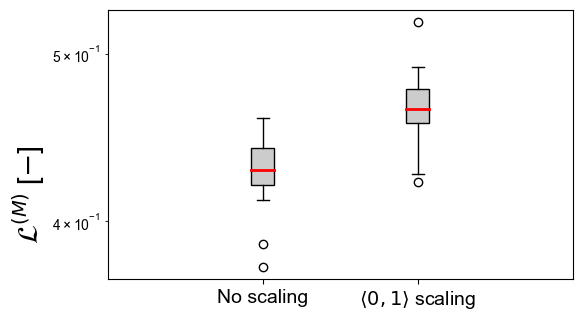

In [22]:
figure = plt.figure(figsize=(6, 3.5))
xrange = [i for i in range(1,3)]
box_plot = plt.boxplot(costs_collected, zorder=20, boxprops=dict(facecolor='#cccccc'), patch_artist=True)

for median in box_plot['medians']:
    median.set_color('red')
    median.set_linewidth(2)

plt.ylabel('$\mathcal{L}^{(M)}$ [$-$]', fontsize=20, horizontalalignment='right');
plt.yscale('log')
plt.xlim([0,3])
plt.xticks(xrange, ['No scaling', r'$\langle0, 1 \rangle$ scaling'], rotation=0, fontsize=14, zorder=10);
plt.yticks(fontsize=9)

plt.savefig('../paper/supplementary-figures/effect-of-scaling-averaged-cost.pdf', dpi=500, bbox_inches='tight')

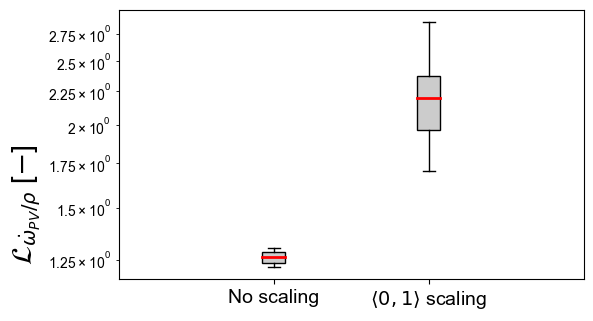

In [23]:
figure = plt.figure(figsize=(6, 3.5))
xrange = [i for i in range(1,3)]
box_plot = plt.boxplot(costs_collected_PV_source, zorder=20, boxprops=dict(facecolor='#cccccc'), patch_artist=True)

for median in box_plot['medians']:
    median.set_color('red')
    median.set_linewidth(2)

plt.ylabel('$\mathcal{L}_{\dot{\omega}_{PV} / \\rho}$ [$-$]', fontsize=20, horizontalalignment='right');
plt.yscale('log')
plt.xlim([0,3])
plt.xticks(xrange, ['No scaling', r'$\langle0, 1 \rangle$ scaling'], rotation=0, fontsize=14, zorder=10);
plt.yticks(fontsize=9)

plt.savefig('../paper/supplementary-figures/effect-of-scaling-PV-source-cost.pdf', dpi=500, bbox_inches='tight')

***

© K. Zdybał, J. C. Sutherland, A. Parente, Combustion and Flame (2024)